In [39]:
urls = ["https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/bb29f06b207f8ec7f7c49c9e13f4115da8db2669/assets/runway.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/emma_salt_pepper.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/highlights_and_shadows.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/looking_out.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/im02.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/im02small.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/im03.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/im03small.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/taylor_small.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/taylor_very_small.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/taylor.jpg"]

for url in urls:
    print(f"Downloading from: {url.split('/')[-1]}")
    raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    !wget -q {raw_url} -O {raw_url.split("/")[-1]}

print("\nDownloaded files:")
!ls *.jpg *.png


Downloaded files:
emma_salt_pepper.jpg	    im03.png	     taylor.jpg
highlights_and_shadows.jpg  im03small.png    taylor_small.jpg
im02.png		    looking_out.jpg  taylor_very_small.jpg
im02small.png		    runway.png


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Qusetion 01

In [3]:
img_orig = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)

def get_gamma_lut(gamma):
    r = np.arange(256)
    lut = ((r / 255.0) ** gamma) * 255.0
    return np.clip(lut, 0, 255).astype(np.uint8)

In [4]:
lut_gamma_05 = get_gamma_lut(0.5)
lut_gamma_20 = get_gamma_lut(2.0)

img_gamma_05 = cv.LUT(img_orig, lut_gamma_05)
img_gamma_20 = cv.LUT(img_orig, lut_gamma_20)

In [5]:
r1, r2 = 0.2, 0.8

r1_val = r1 * 255
r2_val = r2 * 255

lut_stretch = np.zeros(256, dtype=np.float32)

for r in range(256):
    if r < r1_val:
        lut_stretch[r] = 0
    elif r > r2_val:
        lut_stretch[r] = 1
    else:
        lut_stretch[r] = (r - r1_val) / (r2_val - r1_val)

lut_stretch = (lut_stretch * 255).astype(np.uint8)
img_stretch = cv.LUT(img_orig, lut_stretch)

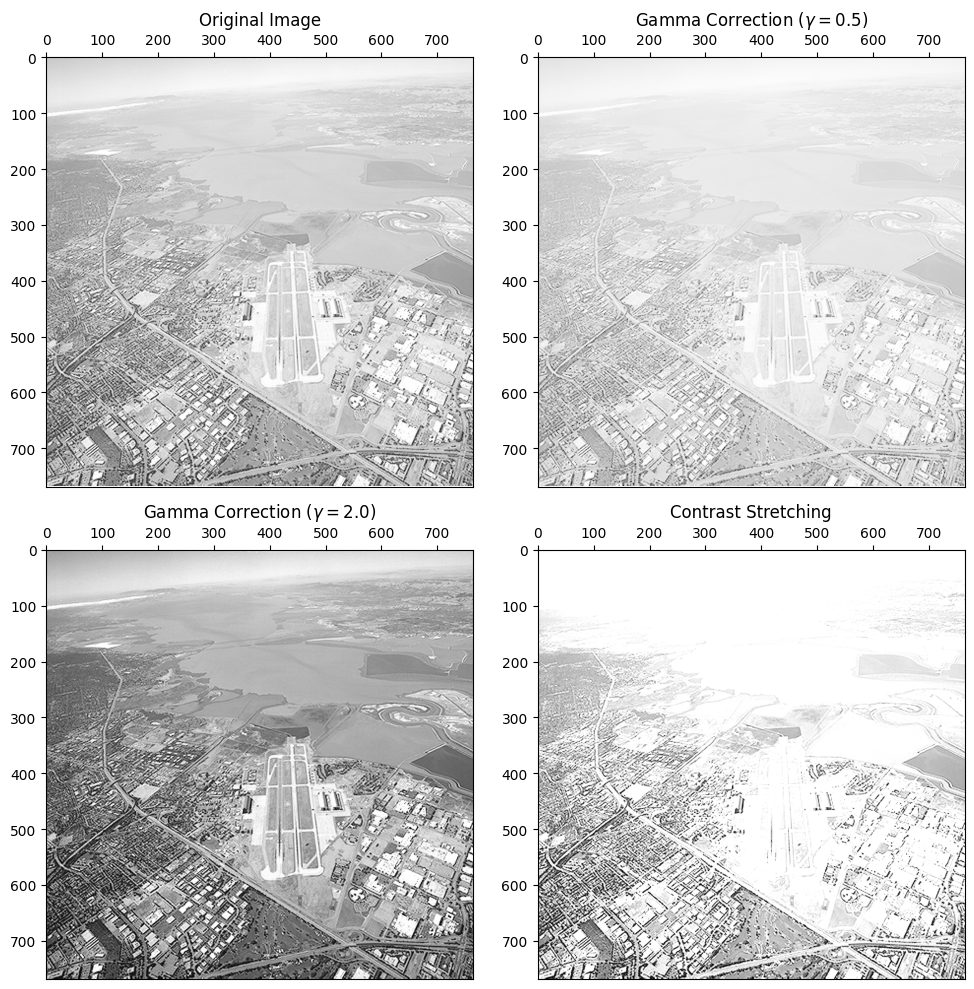

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Original
ax[0, 0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].xaxis.set_ticks_position('top')

# Gamma 0.5
ax[0, 1].imshow(img_gamma_05, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title(r'Gamma Correction ($\gamma=0.5$)')
ax[0, 1].xaxis.set_ticks_position('top')

# Gamma 2.0
ax[1, 0].imshow(img_gamma_20, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title(r'Gamma Correction ($\gamma=2.0$)')
ax[1, 0].xaxis.set_ticks_position('top')

# Contrast Stretching
ax[1, 1].imshow(img_stretch, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Contrast Stretching')
ax[1, 1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 02

In [7]:
img_orig = cv.imread('highlights_and_shadows.jpg')
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
l_plane, a_plane, b_plane = cv.split(img_lab)

In [8]:
gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
l_corrected = cv.LUT(l_plane, table)
img_lab_corrected = cv.merge((l_corrected, a_plane, b_plane))
img_result = cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2BGR)

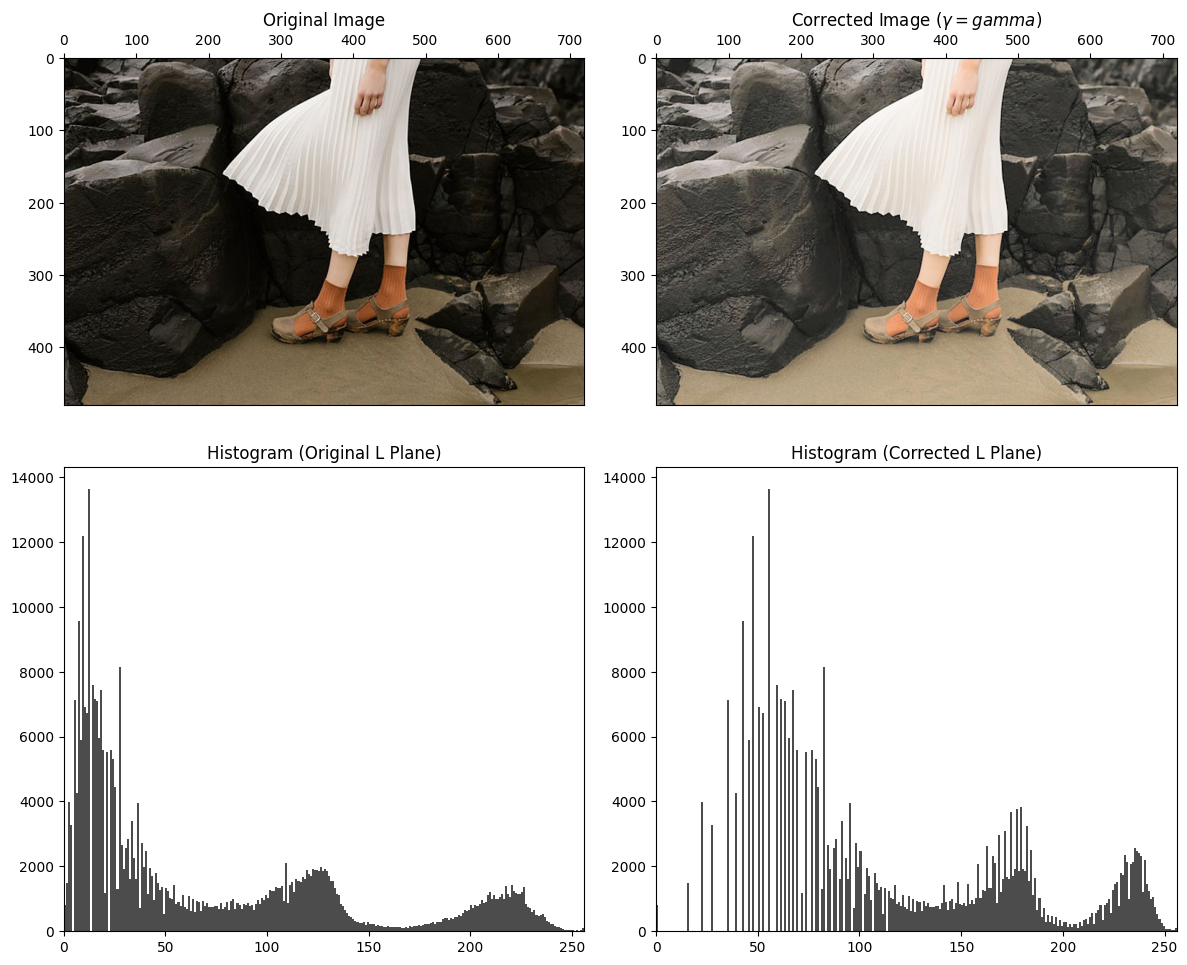

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
ax[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 0].xaxis.set_ticks_position('top')

# Corrected Image
ax[0, 1].imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
ax[0, 1].set_title(r'Corrected Image ($\gamma={gamma}$)')
ax[0, 1].xaxis.set_ticks_position('top')

# Histogram of Original L Plane
ax[1, 0].hist(l_plane.ravel(), 256, range=[0, 256], color='black', alpha=0.7)
ax[1, 0].set_title('Histogram (Original L Plane)')
ax[1, 0].set_xlim([0, 256])

# Histogram of Corrected L Plane
ax[1, 1].hist(l_corrected.ravel(), 256, range=[0, 256], color='black', alpha=0.7)
ax[1, 1].set_title('Histogram (Corrected L Plane)')
ax[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()

# Question 03

In [12]:
def histogram_equalization(img):
    M, N = img.shape
    total_pixels = M * N

    hist = np.zeros(256, dtype=int)
    for i in range(256):
        hist[i] = np.sum(img == i)

    pdf = hist / total_pixels

    cdf = np.zeros(256, dtype=float)
    current_sum = 0
    for i in range(256):
        current_sum += pdf[i]
        cdf[i] = current_sum

    map_table = np.round(cdf * 255).astype(np.uint8)

    equalized_img = map_table[img]

    return equalized_img

In [13]:
img_orig = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)
img_eq = histogram_equalization(img_orig)

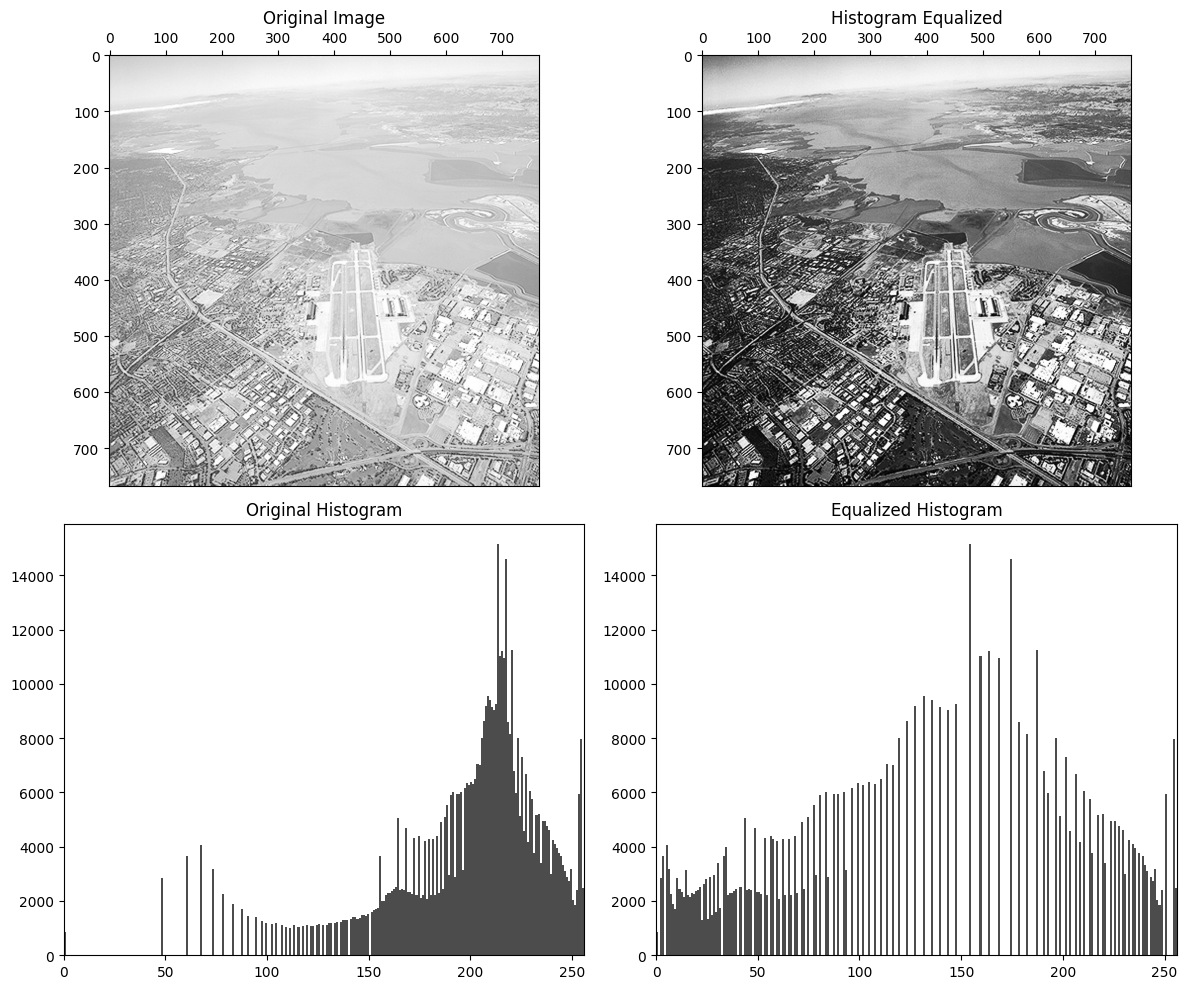

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
ax[0, 0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].xaxis.set_ticks_position('top')

# Equalized Image
ax[0, 1].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Histogram Equalized')
ax[0, 1].xaxis.set_ticks_position('top')

# Original Histogram
ax[1, 0].hist(img_orig.ravel(), 256, range=[0, 256], color='black', alpha=0.7)
ax[1, 0].set_title('Original Histogram')
ax[1, 0].set_xlim([0, 256])

# Equalized Histogram
ax[1, 1].hist(img_eq.ravel(), 256, range=[0, 256], color='black', alpha=0.7)
ax[1, 1].set_title('Equalized Histogram')
ax[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()

# Question 04

In [16]:
img_gray = cv.imread('looking_out.jpg', cv.IMREAD_GRAYSCALE)
otsu_thresh_val, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
print(f"Otsu Threshold Value: {otsu_thresh_val}")

Otsu Threshold Value: 101.0


In [17]:
foreground_pixels = img_gray[mask == 255]

hist, bins = np.histogram(foreground_pixels.ravel(), 256, [0, 256])

cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

img_eq_foreground = img_gray.copy()

img_eq_foreground[mask == 255] = cdf_final[img_gray[mask == 255]]

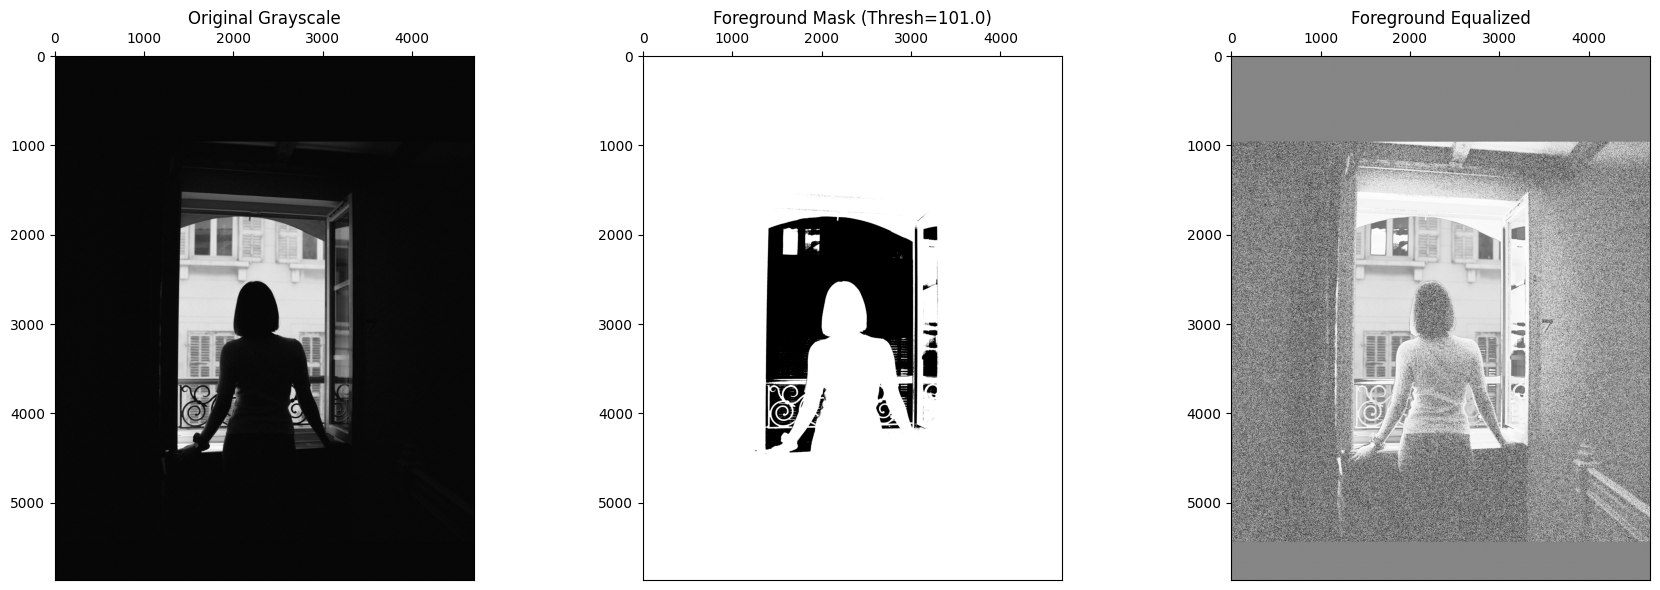

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original
ax[0].imshow(img_gray, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grayscale')
ax[0].xaxis.set_ticks_position('top')

# Binary Mask
ax[1].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Foreground Mask (Thresh={otsu_thresh_val})')
ax[1].xaxis.set_ticks_position('top')

# Foreground Equalized
ax[2].imshow(img_eq_foreground, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Foreground Equalized')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 05

In [22]:
def get_gaussian_kernel(k_size, sigma):
    center = k_size // 2
    x, y = np.meshgrid(np.arange(-center, center + 1), np.arange(-center, center + 1))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)

    return kernel

In [23]:
img_orig = cv.imread('im02.png', cv.IMREAD_GRAYSCALE)

In [27]:
kernel_5x5 = get_gaussian_kernel(5, 2)

print(r"Computed 5x5 Gaussian Kernel (σ = 2):")
with np.printoptions(precision=5, suppress=True):
    print(kernel_5x5)

Computed 5x5 Gaussian Kernel (σ = 2):
[[0.02325 0.03382 0.03833 0.03382 0.02325]
 [0.03382 0.04921 0.05577 0.04921 0.03382]
 [0.03833 0.05577 0.06319 0.05577 0.03833]
 [0.03382 0.04921 0.05577 0.04921 0.03382]
 [0.02325 0.03382 0.03833 0.03382 0.02325]]


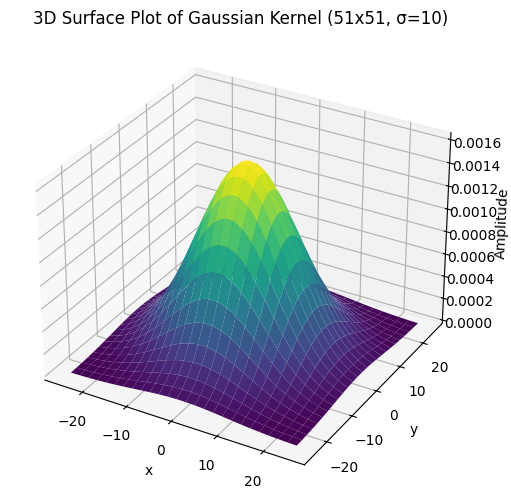

In [35]:
# Note: Used σ=10 for the 3D plot to make the surface curvature visible on the 51x51 grid.
kernel_large = get_gaussian_kernel(51, 10)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

center = 51 // 2
x = np.arange(-center, center + 1)
y = np.arange(-center, center + 1)
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, kernel_large, cmap='viridis', linewidth=0)
ax.set_title(f'3D Surface Plot of Gaussian Kernel (51x51, σ=10)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Amplitude')
plt.show()

In [30]:
img_gaussian_manual = cv.filter2D(img_orig, -1, kernel_5x5)

In [31]:
img_gaussian_cv = cv.GaussianBlur(img_orig, (5, 5), 2)

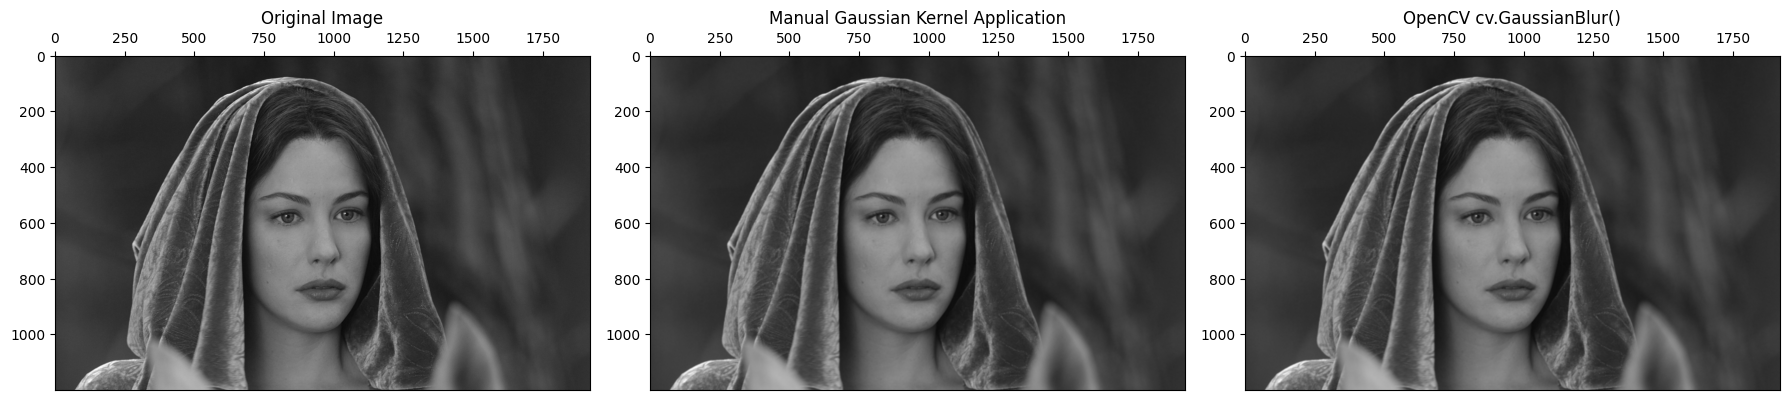

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].xaxis.set_ticks_position('top')

ax[1].imshow(img_gaussian_manual, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Manual Gaussian Kernel Application')
ax[1].xaxis.set_ticks_position('top')

ax[2].imshow(img_gaussian_cv, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('OpenCV cv.GaussianBlur()')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 06

In [12]:
def get_dog_kernels(k_size, sigma):
    center = k_size // 2
    x, y = np.meshgrid(np.arange(-center, center + 1), np.arange(-center, center + 1))

    G = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    G = G / np.sum(G)
    Gx = -(x / sigma**2) * G
    Gy = -(y / sigma**2) * G

    return Gx, Gy

In [33]:
img_orig = cv.imread('im02.png', cv.IMREAD_GRAYSCALE)

In [34]:
Gx_5, Gy_5 = get_dog_kernels(5, 2)

print("Computed 5x5 DoG Kernel (Gx):")
with np.printoptions(precision=4, suppress=True):
    print(Gx_5)

print("\nComputed 5x5 DoG Kernel (Gy):")
with np.printoptions(precision=5, suppress=True):
    print(Gy_5)

Computed 5x5 DoG Kernel (Gx):
[[ 0.0116  0.0085 -0.     -0.0085 -0.0116]
 [ 0.0169  0.0123 -0.     -0.0123 -0.0169]
 [ 0.0192  0.0139 -0.     -0.0139 -0.0192]
 [ 0.0169  0.0123 -0.     -0.0123 -0.0169]
 [ 0.0116  0.0085 -0.     -0.0085 -0.0116]]

Computed 5x5 DoG Kernel (Gy):
[[ 0.01162  0.01691  0.01916  0.01691  0.01162]
 [ 0.00846  0.0123   0.01394  0.0123   0.00846]
 [-0.      -0.      -0.      -0.      -0.     ]
 [-0.00846 -0.0123  -0.01394 -0.0123  -0.00846]
 [-0.01162 -0.01691 -0.01916 -0.01691 -0.01162]]


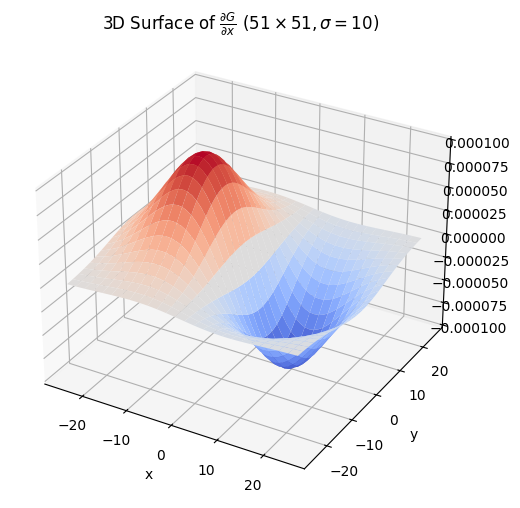

In [35]:
Gx_large, _ = get_dog_kernels(51, 10)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

center = 51 // 2
x_grid = np.arange(-center, center + 1)
y_grid = np.arange(-center, center + 1)
X, Y = np.meshgrid(x_grid, y_grid)

surf = ax.plot_surface(X, Y, Gx_large, cmap='coolwarm', linewidth=0)
ax.set_title(r'3D Surface of $\frac{\partial G}{\partial x}$ ($51\times51, \sigma=10$)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [36]:
grad_x_dog = cv.filter2D(img_orig, cv.CV_64F, Gx_5)
grad_y_dog = cv.filter2D(img_orig, cv.CV_64F, Gy_5)

abs_grad_x_dog = np.abs(grad_x_dog)
abs_grad_y_dog = np.abs(grad_y_dog)

disp_x_dog = cv.normalize(abs_grad_x_dog, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
disp_y_dog = cv.normalize(abs_grad_y_dog, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

In [37]:
grad_x_sobel = cv.Sobel(img_orig, cv.CV_64F, 1, 0, ksize=5)
grad_y_sobel = cv.Sobel(img_orig, cv.CV_64F, 0, 1, ksize=5)

disp_x_sobel = cv.normalize(np.abs(grad_x_sobel), None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
disp_y_sobel = cv.normalize(np.abs(grad_y_sobel), None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

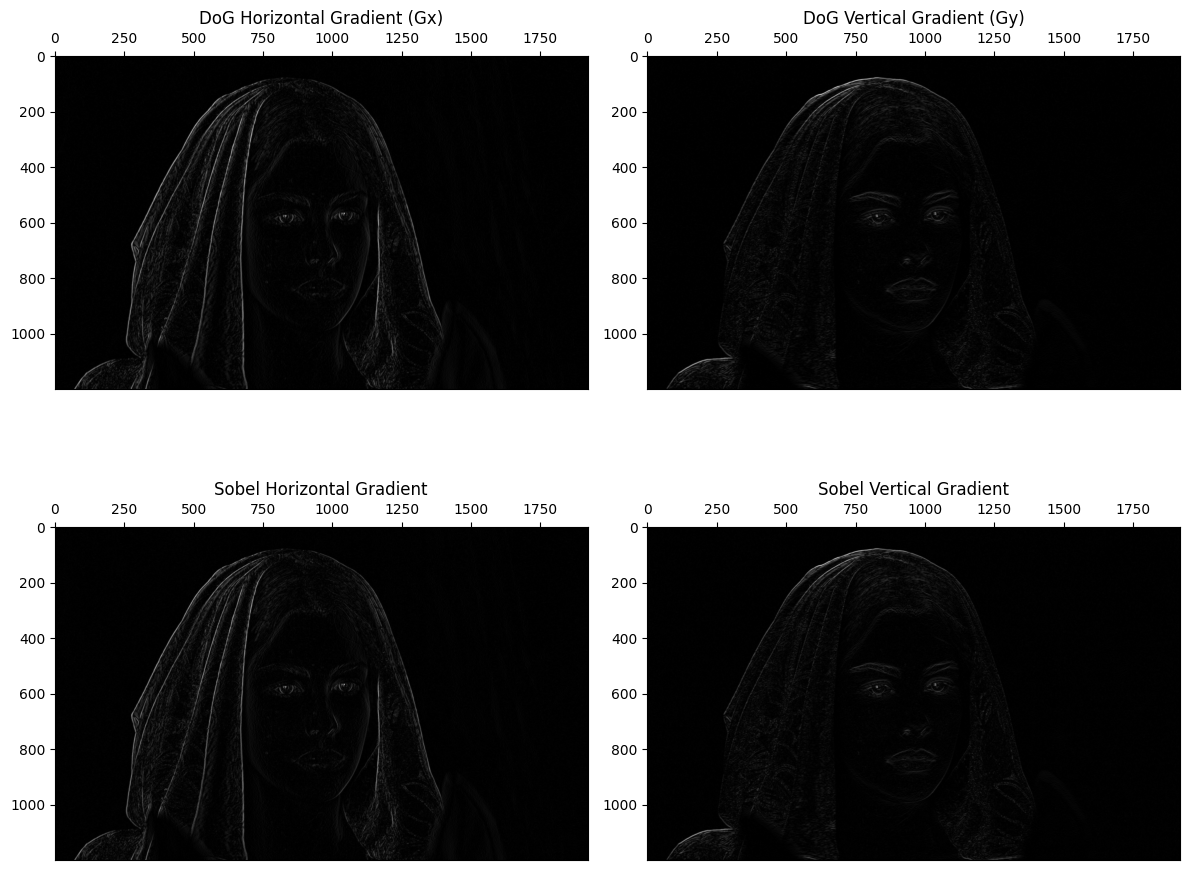

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Manual DoG Results
ax[0, 0].imshow(disp_x_dog, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('DoG Horizontal Gradient (Gx)')
ax[0, 0].xaxis.set_ticks_position('top')

ax[0, 1].imshow(disp_y_dog, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('DoG Vertical Gradient (Gy)')
ax[0, 1].xaxis.set_ticks_position('top')

# OpenCV Sobel Results
ax[1, 0].imshow(disp_x_sobel, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Sobel Horizontal Gradient')
ax[1, 0].xaxis.set_ticks_position('top')

ax[1, 1].imshow(disp_y_sobel, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Sobel Vertical Gradient')
ax[1, 1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 07

In [41]:
def manual_zoom(img, scale_factor, method='nearest'):
    H, W = img.shape

    new_H = int(H * scale_factor)
    new_W = int(W * scale_factor)

    output_img = np.zeros((new_H, new_W), dtype=np.uint8)

    for i_out in range(new_H):
        for j_out in range(new_W):
            r = i_out / scale_factor
            c = j_out / scale_factor

            if method == 'nearest':
                r_near = int(np.round(r))
                c_near = int(np.round(c))

                r_near = min(max(r_near, 0), H - 1)
                c_near = min(max(c_near, 0), W - 1)

                output_img[i_out, j_out] = img[r_near, c_near]

            elif method == 'bilinear':
                r1 = int(np.floor(r))
                c1 = int(np.floor(c))

                r2 = min(r1 + 1, H - 1)
                c2 = min(c1 + 1, W - 1)

                a = r - r1
                b = c - c1

                f_11 = img[r1, c1]
                f_12 = img[r1, c2]
                f_21 = img[r2, c1]
                f_22 = img[r2, c2]

                val = (1 - a) * (1 - b) * f_11 + \
                      (1 - a) * (b) * f_12 + \
                      (a) * (1 - b) * f_21 + \
                      (a) * (b) * f_22

                output_img[i_out, j_out] = int(np.round(val))

    return output_img

In [42]:
def compute_normalized_ssd(img_orig, img_zoomed):
    if img_orig.shape != img_zoomed.shape:
        img_zoomed = cv.resize(
            img_zoomed, (img_orig.shape[1], img_orig.shape[0]))

    arr_orig = img_orig.astype(np.float64)
    arr_zoomed = img_zoomed.astype(np.float64)

    diff_sq = np.sum((arr_orig - arr_zoomed) ** 2)
    norm = np.sum(arr_orig ** 2)

    return diff_sq / norm

In [43]:
img_orig = cv.imread('taylor.jpg', cv.IMREAD_GRAYSCALE)
img_small = cv.imread('taylor_small.jpg', cv.IMREAD_GRAYSCALE)

In [44]:
scale_factor = img_orig.shape[1] / img_small.shape[1]
print(f"Calculated Scale Factor: {scale_factor:.2f}")

print("Applying Nearest Neighbor Zoom...")
zoom_nn = manual_zoom(img_small, scale_factor, method='nearest')

print("Applying Bilinear Interpolation Zoom...")
zoom_bilinear = manual_zoom(img_small, scale_factor, method='bilinear')

ssd_nn = compute_normalized_ssd(img_orig, zoom_nn)
ssd_bilinear = compute_normalized_ssd(img_orig, zoom_bilinear)

print(f"\nNormalized SSD (Nearest Neighbor): {ssd_nn:.6f}")
print(f"Normalized SSD (Bilinear):         {ssd_bilinear:.6f}")

Calculated Scale Factor: 5.00
Applying Nearest Neighbor Zoom...
Applying Bilinear Interpolation Zoom...

Normalized SSD (Nearest Neighbor): 0.007586
Normalized SSD (Bilinear):         0.006811


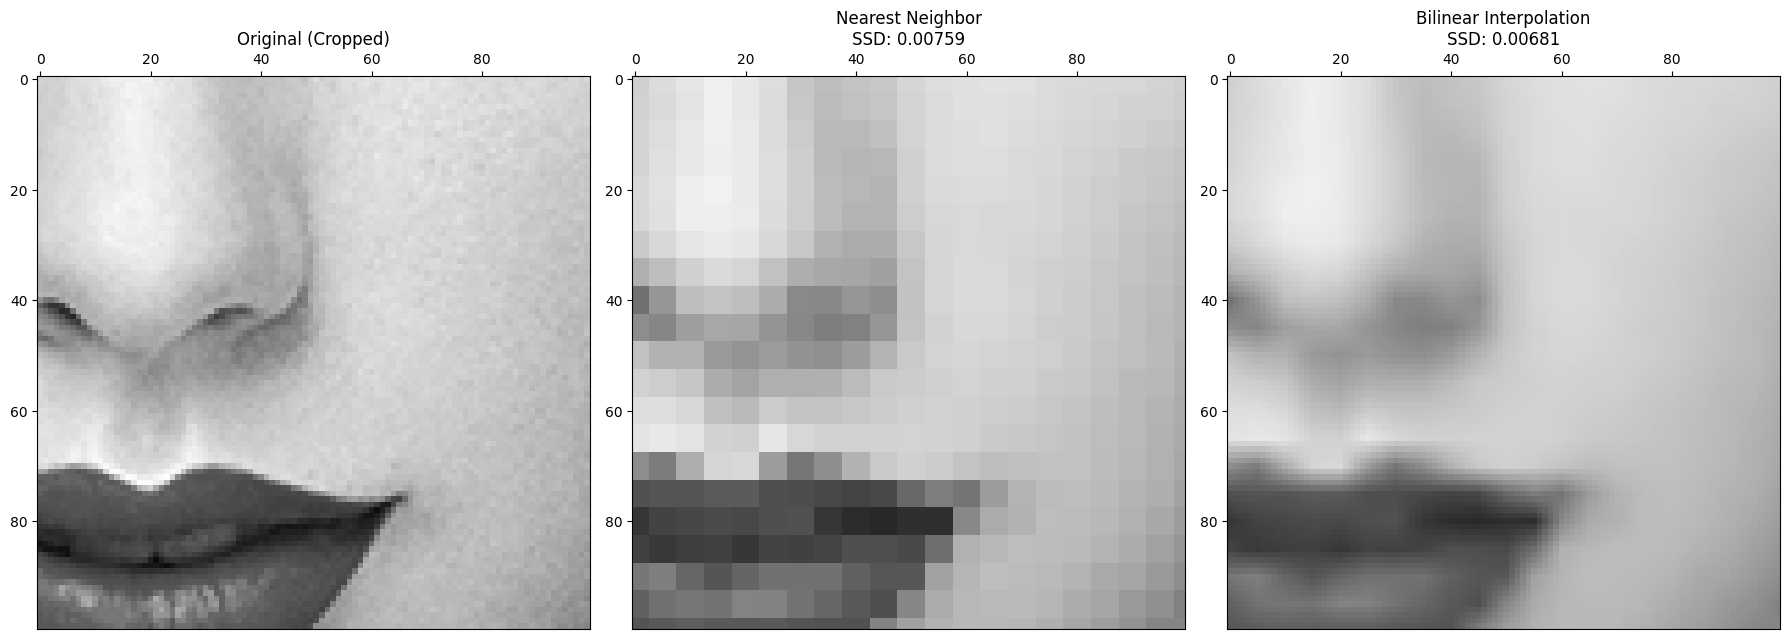

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

h, w = img_orig.shape
crop_y, crop_x = slice(h//2 - 50, h//2 + 50), slice(w//2 - 50, w//2 + 50)

ax[0].imshow(img_orig[crop_y, crop_x], cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original (Cropped)')
ax[0].xaxis.set_ticks_position('top')

ax[1].imshow(zoom_nn[crop_y, crop_x], cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Nearest Neighbor\nSSD: {ssd_nn:.5f}')
ax[1].xaxis.set_ticks_position('top')

ax[2].imshow(zoom_bilinear[crop_y, crop_x], cmap='gray', vmin=0, vmax=255)
ax[2].set_title(f'Bilinear Interpolation\nSSD: {ssd_bilinear:.5f}')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 08

In [46]:
img_noisy = cv.imread('emma_salt_pepper.jpg', cv.IMREAD_GRAYSCALE)

img_gaussian = cv.GaussianBlur(img_noisy, (5, 5), 0)
img_median = cv.medianBlur(img_noisy, 5)

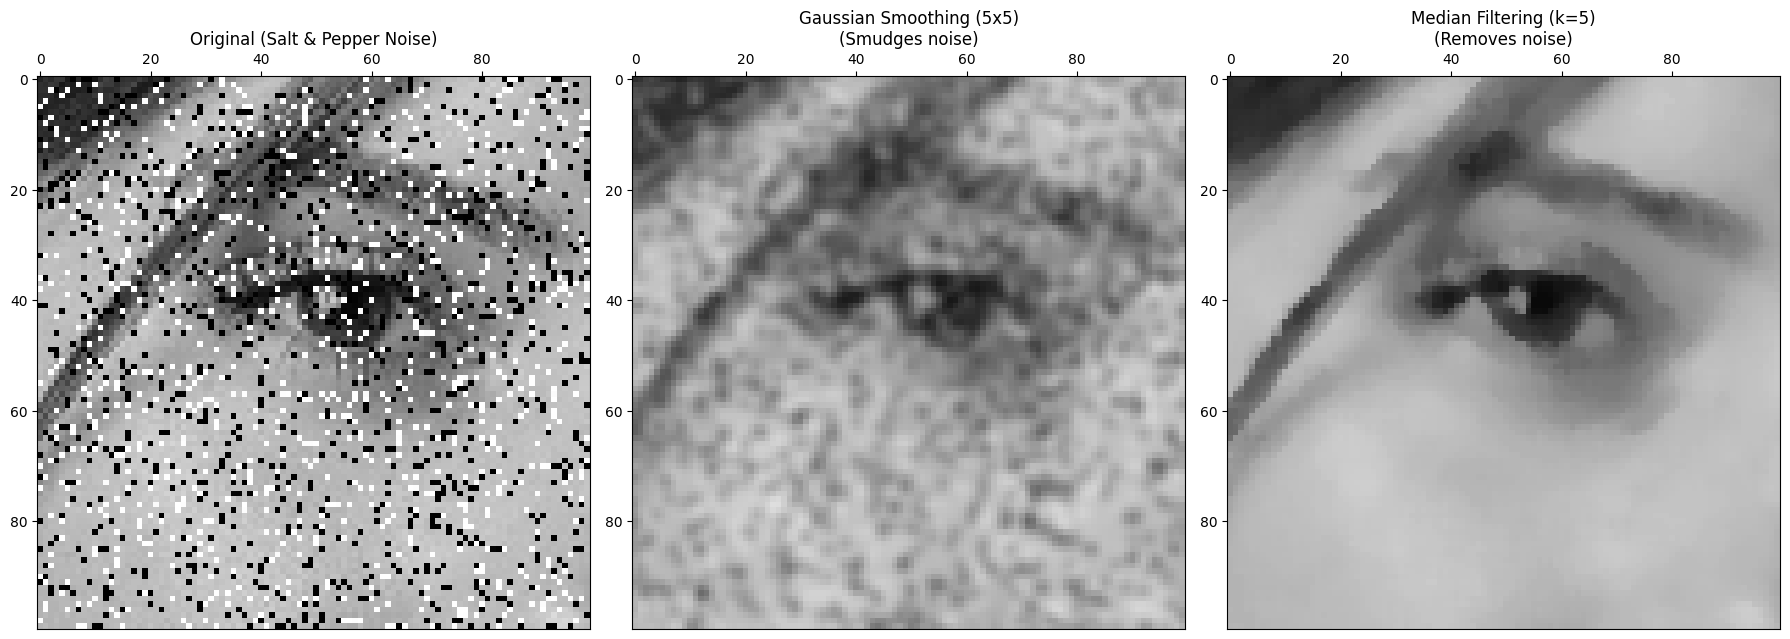

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

h, w = img_noisy.shape
cy, cx = h // 2, w // 2
crop_slice = (slice(cy - 50, cy + 50), slice(cx - 50, cx + 50))

# Original Noisy Image
ax[0].imshow(img_noisy[crop_slice], cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original (Salt & Pepper Noise)')
ax[0].xaxis.set_ticks_position('top')

# Gaussian Result
ax[1].imshow(img_gaussian[crop_slice], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gaussian Smoothing (5x5)\n(Smudges noise)')
ax[1].xaxis.set_ticks_position('top')

# Median Result
ax[2].imshow(img_median[crop_slice], cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Median Filtering (k=5)\n(Removes noise)')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

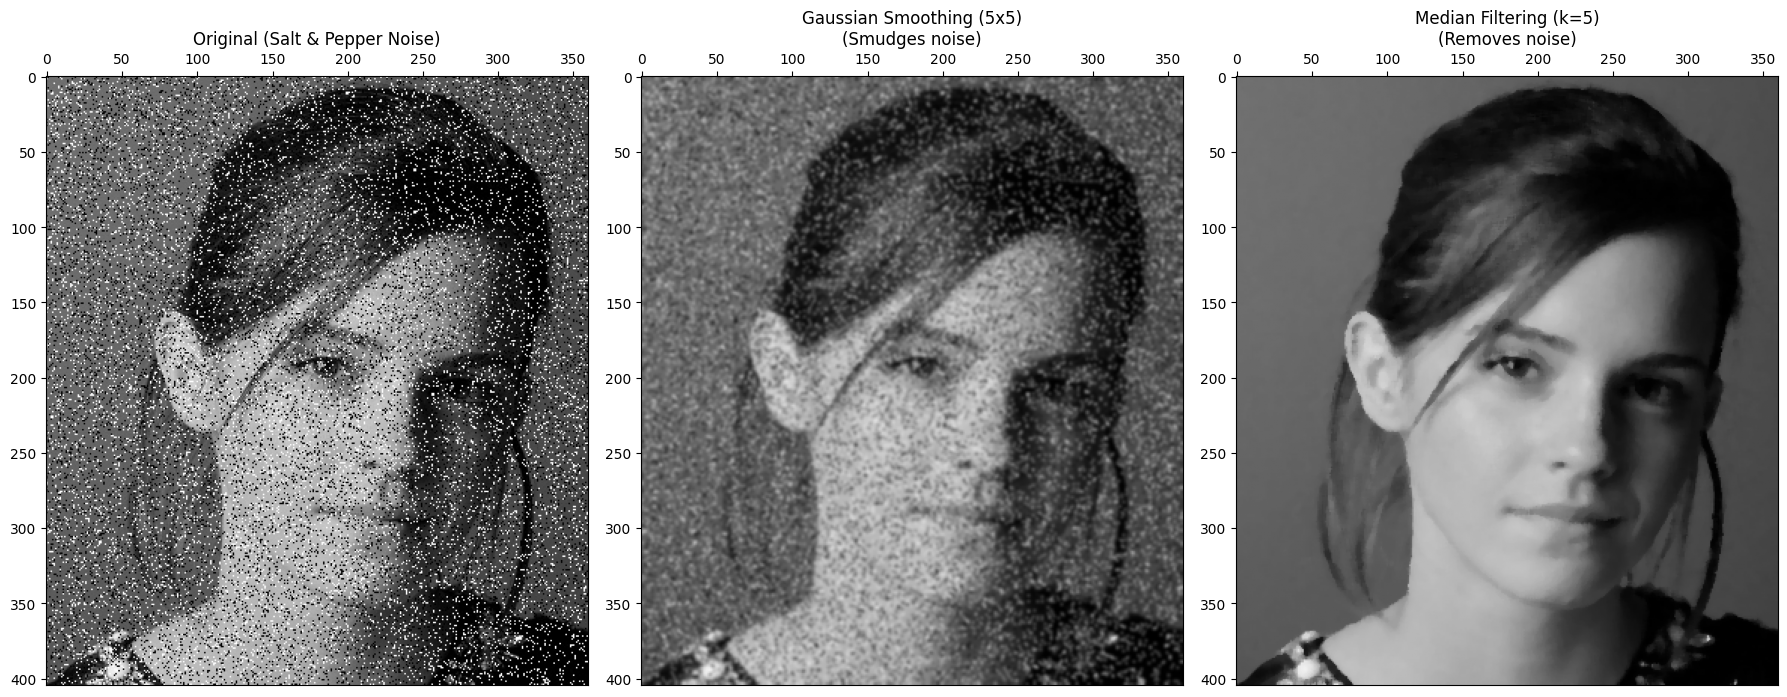

In [48]:
# Full Image
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

# Original Noisy Image
ax[0].imshow(img_noisy, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original (Salt & Pepper Noise)')
ax[0].xaxis.set_ticks_position('top')

# Gaussian Result
ax[1].imshow(img_gaussian, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gaussian Smoothing (5x5)\n(Smudges noise)')
ax[1].xaxis.set_ticks_position('top')

# Median Result
ax[2].imshow(img_median, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Median Filtering (k=5)\n(Removes noise)')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 09

In [53]:
img_orig = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)

kernel_sharpen = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]])

img_sharpened = cv.filter2D(img_orig, -1, kernel_sharpen)

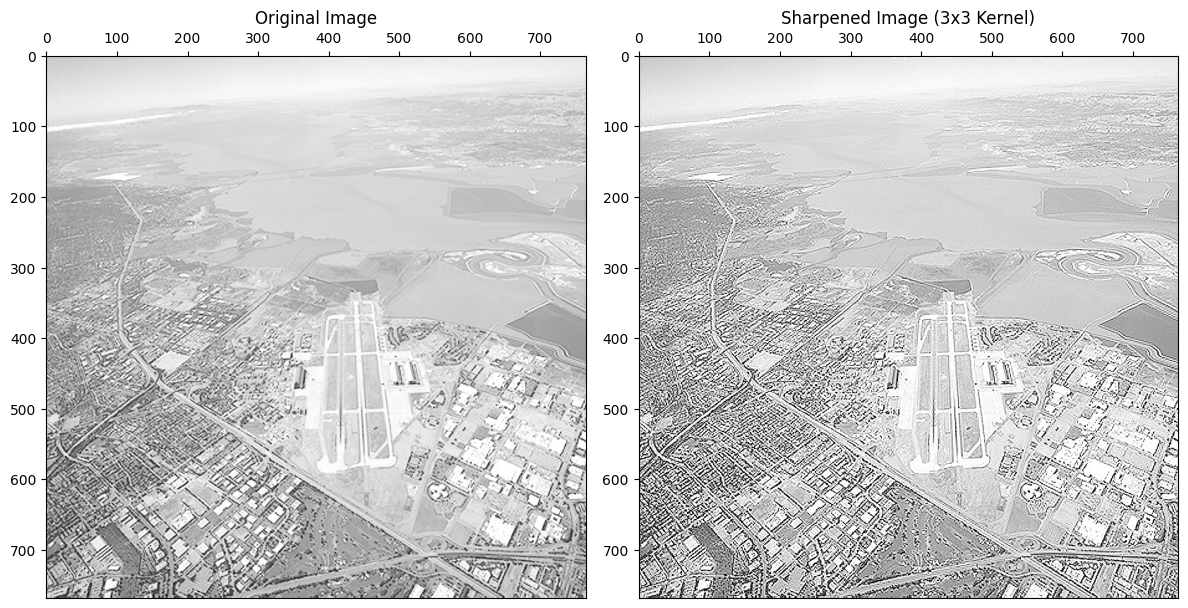

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].xaxis.set_ticks_position('top')

# Sharpened
ax[1].imshow(img_sharpened, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sharpened Image (3x3 Kernel)')
ax[1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

# Question 10

In [55]:
def manual_bilateral_filter(img, d, sigma_s, sigma_r):
    H, W = img.shape
    output_img = np.zeros_like(img)

    pad_size = d // 2
    padded_img = cv.copyMakeBorder(
        img, pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

    coords = np.arange(-pad_size, pad_size + 1)
    x, y = np.meshgrid(coords, coords)
    spatial_kernel = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))

    for i in range(H):
        for j in range(W):
            roi = padded_img[i:i+d, j:j+d]

            center_val = padded_img[i + pad_size, j + pad_size]

            intensity_diff = roi - center_val
            range_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))

            weights = spatial_kernel * range_kernel

            norm_factor = np.sum(weights)
            result = np.sum(weights * roi) / norm_factor

            output_img[i, j] = int(np.round(result))

    return output_img

In [56]:
img_orig = cv.imread('im02.png', cv.IMREAD_GRAYSCALE)

img_small = cv.resize(img_orig, (0, 0), fx=0.5, fy=0.5)

In [57]:
d = 9
sigma_s = 75
sigma_r = 75

img_bilateral_manual = manual_bilateral_filter(img_small, d, sigma_s, sigma_r)

img_gaussian = cv.GaussianBlur(img_small, (d, d), sigma_s)

img_bilateral_cv = cv.bilateralFilter(img_small, d, sigma_r, sigma_s)

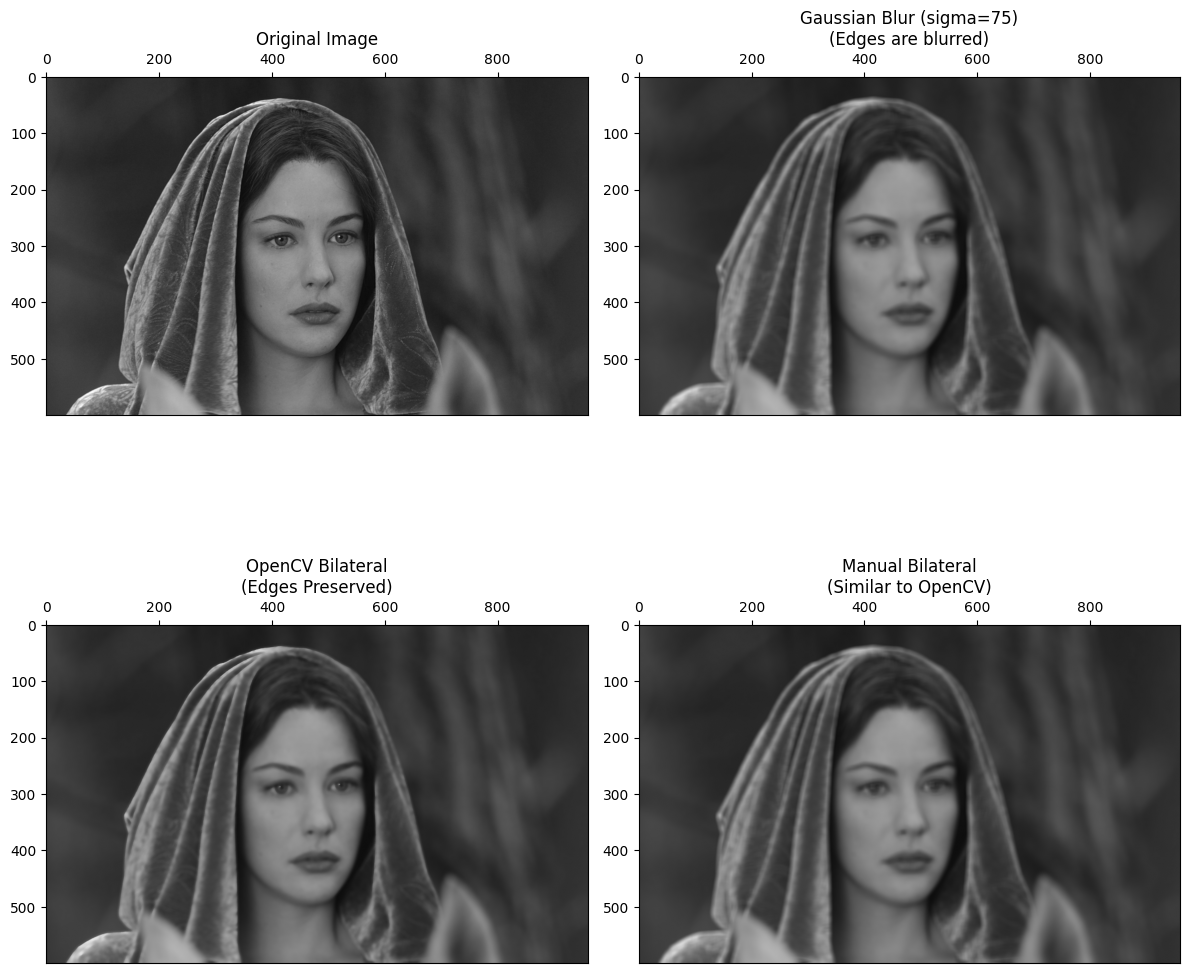

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Original
ax[0, 0].imshow(img_small, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].xaxis.set_ticks_position('top')

# Gaussian
ax[0, 1].imshow(img_gaussian, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title(f'Gaussian Blur (sigma={sigma_s})\n(Edges are blurred)')
ax[0, 1].xaxis.set_ticks_position('top')

# OpenCV Bilateral
ax[1, 0].imshow(img_bilateral_cv, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title(f'OpenCV Bilateral\n(Edges Preserved)')
ax[1, 0].xaxis.set_ticks_position('top')

# Manual Bilateral
ax[1, 1].imshow(img_bilateral_manual, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title(f'Manual Bilateral\n(Similar to OpenCV)')
ax[1, 1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()